# Import Libraries

In [1]:
import cv2
import numpy as np
import os
import imutils

from matplotlib import pyplot as plt
%matplotlib inline


# Preprocessing

In [2]:
#create lists to save the labels (the name of the shape)
train_dir = '/home/trojan/Desktop/pattern recognition/PB1/Implementation/data/shapes'
shape_list = ['circle', 'triangle', 'tetragon', 'pentagon', 'other']

## Helper functions

In [3]:
class ShapeDetector:
    def __init__(self):
        pass
    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        if 5 < len(approx) < 10:
            shape = "other"    
        # if the shape is a triangle, it will have 3 vertices
        if len(approx) == 3:
            shape = "triangle" 
        # if the shape has 4 vertices, it is a tetragon
        elif len(approx) == 4:
            shape = "tetragon" 
        # if the shape is a pentagon, it will have 5 vertices
        elif len(approx) == 5:
            shape = "pentagon" 
        # otherwise, we assume the shape is other
        elif len(approx) > 10:
            shape = "circle"
            
        return shape, approx

# Training

In [4]:
#iterate through each shape
all_labels, all_images = [],[]
for shape in shape_list:
    print('Getting data for: ', shape)
    for file_name in os.listdir(os.path.join(train_dir,shape)):
        all_images.append(cv2.imread(os.path.join(train_dir,shape,file_name), 1))
        #add an integer to the labels list
        all_labels.append(shape)

Getting data for:  circle
Getting data for:  triangle
Getting data for:  tetragon
Getting data for:  pentagon
Getting data for:  other


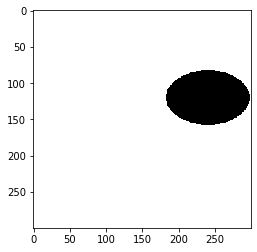

In [5]:
plt.imshow(all_images[0])

In [6]:
print(all_labels)

['circle', 'circle', 'circle', 'circle', 'circle', 'triangle', 'triangle', 'triangle', 'triangle', 'triangle', 'tetragon', 'tetragon', 'tetragon', 'tetragon', 'tetragon', 'pentagon', 'pentagon', 'pentagon', 'pentagon', 'pentagon', 'other', 'other', 'other', 'other', 'other']


In [7]:
pred_labels = []

for img in all_images:
    
    #resized = imutils.resize(image, width=300)
    #ratio = image.shape[0] / float(resized.shape[0])
    # Find Canny edges 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    #blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    #thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    
    #edged = cv2.Canny(thresh, 30, 200) 

    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    #contour = imutils.grab_contours(contour)
    sd = ShapeDetector()
    
    for contour in contours:
        shape, approx = sd.detect(contour)
        #pred_labels.append(shape)
        #approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        cv2.drawContours(img, [approx], 0, (0, 255, 0), 2)
        x = approx.ravel()[0]
        y = approx.ravel()[1] - 5
         
        # then draw the contours and the name of the shape on the image
        #c = c.astype("float")
        #c *= ratio
        #c = c.astype("int")
        
        cv2.putText(img, shape, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 0, 0), 2)
        # show the output image
    pred_labels.append(shape)
    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [8]:
print(pred_labels)

['circle', 'other', 'circle', 'circle', 'circle', 'tetragon', 'triangle', 'triangle', 'triangle', 'triangle', 'tetragon', 'tetragon', 'tetragon', 'tetragon', 'tetragon', 'pentagon', 'pentagon', 'pentagon', 'pentagon', 'pentagon', 'circle', 'circle', 'other', 'unidentified', 'circle']


In [9]:
print(all_labels)

['circle', 'circle', 'circle', 'circle', 'circle', 'triangle', 'triangle', 'triangle', 'triangle', 'triangle', 'tetragon', 'tetragon', 'tetragon', 'tetragon', 'tetragon', 'pentagon', 'pentagon', 'pentagon', 'pentagon', 'pentagon', 'other', 'other', 'other', 'other', 'other']


In [21]:
SUM = 0
pred_acc = 0

for i in range(len(pred_labels)):
    if pred_labels[i]==all_labels[i]:
        SUM += 1

pred_acc = SUM/len(all_labels)*100

print(SUM)
print("Accuracy = {}".format(pred_acc))

19
Accuracy = 76.0


In [49]:

    """forTA (Do not erase here)
    test_dir = '../ForTA'
    test_labels, test_images = [], []
    for shape in shape_list:
        print('Getting data for: ', shape)
        for file_name in os.listdir(os.path.join(test_dir,shape)):
            test_images.append(cv2.imread(os.path.join(test_dir,shape,file_name), 0))
            #add an integer to the labels list
            test_labels.append(shape_list.index(shape))

    print('Number of test images: ', len(test_images))

    test_images, test_labels = preprocess(test_images, test_labels)
    pred_labels = model.predict(test_images)
    pred_acc = np.sum(pred_labels==test_labels)/len(test_labels)*100
    print("Test Accuracy = {}".format(pred_acc))
    """


'forTA (Do not erase here)\ntest_dir = \'../ForTA\'\ntest_labels, test_images = [], []\nfor shape in shape_list:\n    print(\'Getting data for: \', shape)\n    for file_name in os.listdir(os.path.join(test_dir,shape)):\n        test_images.append(cv2.imread(os.path.join(test_dir,shape,file_name), 0))\n        #add an integer to the labels list\n        test_labels.append(shape_list.index(shape))\n\nprint(\'Number of test images: \', len(test_images))\n\ntest_images, test_labels = preprocess(test_images, test_labels)\npred_labels = model.predict(test_images)\npred_acc = np.sum(pred_labels==test_labels)/len(test_labels)*100\nprint("Test Accuracy = {}".format(pred_acc))\n'